# WeRateDogs Twitter - The Analysis Report

# Introduction

Real-world data rarely comes clean. Using Python and its libraries, I gathered data from a variety of sources and in a variety of formats, assessed its quality and tidiness, then cleaned it. The data was analyzed and visualized.

The dataset used is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for me to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

The goal of this project was to wrangle data from WeRateDogs Twitter's account using Python and document the whole process in a Jupyter Notebook named wrangle_act.ipynb.

This notebook provides the key insights and a conclusion.

# Import and Prep Data

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline

In [2]:
df_twitter_archive_clean = pd.read_csv('./resources/twitter_archive_master.csv')

In [3]:
df_twitter_archive_clean
df_twitter_archive_clean['tweet_id'] = df_twitter_archive_clean['tweet_id'].astype(object)
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean.timestamp)
df_twitter_archive_clean['source'] = df_twitter_archive_clean['source'].astype('category')
df_twitter_archive_clean['life_stage'] = df_twitter_archive_clean['life_stage'].astype('category')
df_twitter_archive_clean['dog_gender'] = df_twitter_archive_clean['dog_gender'].astype('category')

df_twitter_archive_clean.set_index('timestamp', inplace=True)

# Visualizations & Analysis

### Vizz #1 : Most Common Dog Category

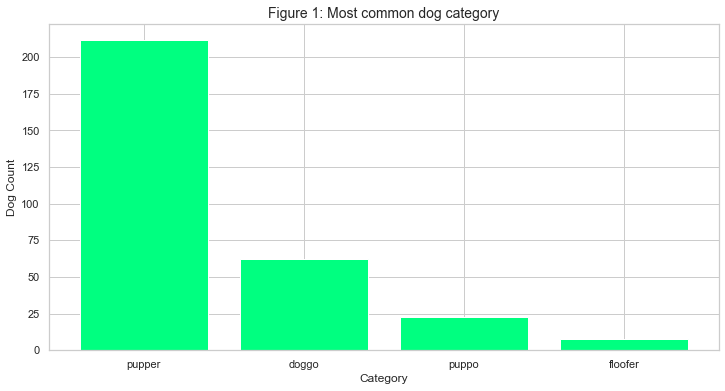

In [25]:
dog_type = ['pupper', 'doggo', 'puppo', 'floofer']
dog_counts = [212, 62, 23, 8]

fig,ax = plt.subplots(figsize = (12,6))
ax.bar(dog_type, dog_counts, width = 0.8, color = '#00FF80')
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Figure 1: Most common dog category", fontsize = '14')
plt.show()

The most common dog category is a pupper, followed by doggo, puppo and floofer. 

### Vizz #2 : Share of Most Common Dog Category

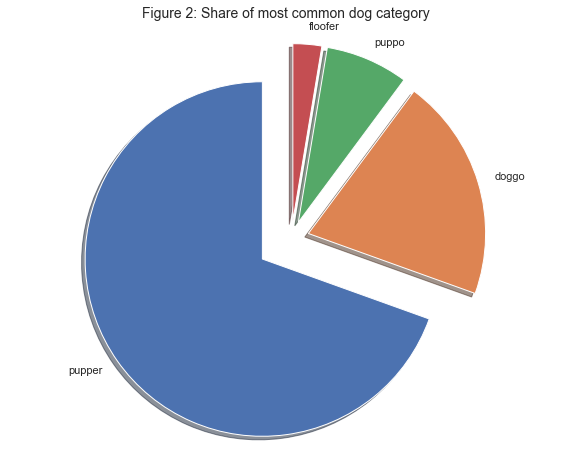

In [27]:
life_stage_count = list(df_twitter_archive_clean[df_twitter_archive_clean['life_stage'] != 'None']['life_stage'].value_counts())[0:4]
life_stages = df_twitter_archive_clean[df_twitter_archive_clean['life_stage'] != 'None']['life_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')
plt.title("Figure 2: Share of most common dog category", fontsize = '14')
plt.show()

The dog category "Pupper" has the highest share in the most common category.

### Vizz #3 : Correlation Heat Map

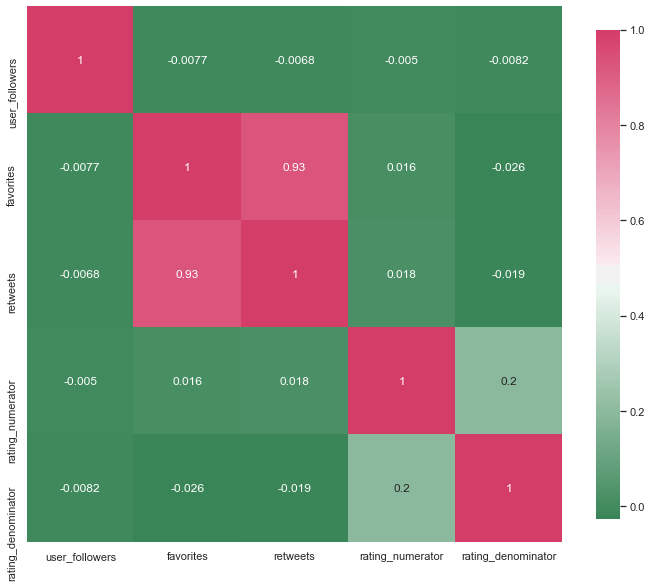

In [19]:
# set up a correlation map
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize = (12,10))
    cmap = sns.diverging_palette(500,0,as_cmap = True)
    _ = sns.heatmap(corr,cmap = cmap,square = True, cbar_kws = {'shrink' : .9}, ax = ax, annot = True)
    annot_kws = {'fontsize': '12'}
    
plot_correlation_map(df_twitter_archive_clean[['user_followers', 'favorites', 'retweets', 'rating_numerator', 'rating_denominator']])

The heat map provides us with an immediate overview on positive/ negative correlations of various variables. It is surprising that only favorites and retweets show a strong positive relationship but no other variables.

### Vizz #4 : Scatter Plot of Favorites and Retweets

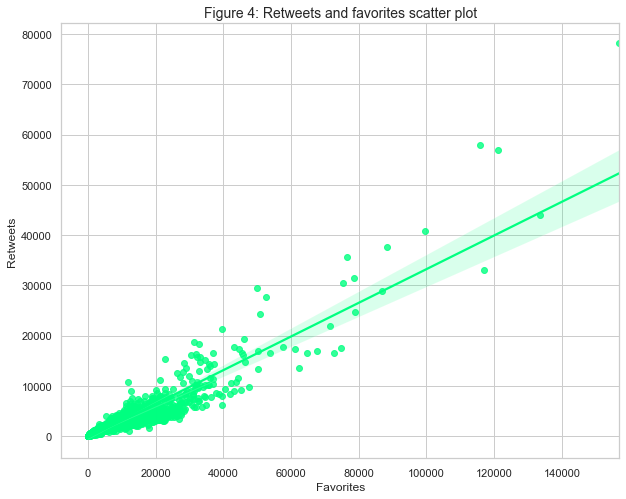

In [20]:
# favorites in relation to retweets, scatterplot
ax = sns.regplot(x = df_twitter_archive_clean['favorites'], y = df_twitter_archive_clean['retweets'], color = '#00FF80')

# formatting
ax.set_title('Figure 4: Retweets and favorites scatter plot', fontsize = '14')
ax.set_xlabel('Favorites', fontsize = '12')
ax.set_ylabel('Retweets', fontsize = '12')
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('whitegrid')

Here we see a strong correlation between favorites and retweets.

### Vizz #5 : Scatter Plot of Favorites and Retweets by Category

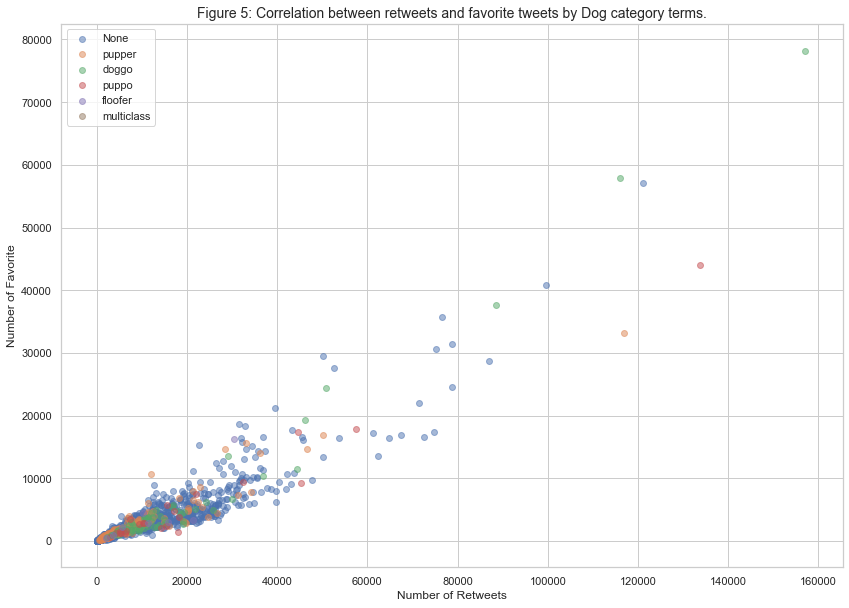

In [21]:
# copying the original data frame, fill NaN values, list terms
df_twitter_archive_clean = df_twitter_archive_clean.copy()
df_twitter_archive_clean.life_stage = df_twitter_archive_clean.life_stage.fillna('None')
dog_terms = ['None', 'pupper', 'doggo', 'puppo', 'floofer', 'multiclass'] # The order is ascending.

# formatting, graphic layers, plotting, axis
plt.figure(figsize = [14, 10])                               
for index in dog_terms:
    prov = df_twitter_archive_clean[df_twitter_archive_clean['life_stage'] == index][['favorites','retweets']]
    plt.scatter(x = prov['favorites'],  
                y = prov['retweets'] , 
                alpha = .5)       
plt.xlabel('Number of Retweets',    
           fontsize = '12')          
plt.ylabel('Number of Favorite',    
           fontsize = '12')          
plt.title('Figure 5: Correlation between retweets and favorite tweets by Dog category terms.',
          fontsize = '14')     
plt.legend(dog_terms)                
plt.show()                           

It is not possible to identify (visually) any pattern or relationship, using the life_stage variable, although there is a strong and positive correlation between Retweets and Favorites, as already calc above.

# Insights & Conclusion

## Insights
- Strong correlation between favorites and retweets, which was expected.
- Negative correlation between user followers and retweets, which was not expected.
- Dogs in __Pupper__ stage of dog life cycle get most tweets, which is expected.
- As expected there is a big positive (+0.9; shown by correlation heat map) correlation between the retweets and favorites.

## Conclusion
This project aims to perform the Data Wrangling and the Exploratory Data Analysis in the WeRateDogs™ Twitter account.  The twitter handle of WeRateDogs gives a lot of interesting insights about people's sentiments when it comes to different breeds of dogs within their different life stages. It also tells us that having more followers on twitter is not directly-proportionally related to more retweets of a users tweet. 